# Analysing all data

This ipython notebook is a quick analysis of all data I have collected playing two rounds of the [two thirds of the average game](https://en.wikipedia.org/wiki/Guess_2/3_of_the_average). I'm writing this to obtain the graphics for a paper that is to be submitted [connections](https://journals.gre.ac.uk/index.php/msor).

First we import the various libraries we will use:

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

Let's now read in the data file and specify the column names:

In [9]:
data = pd.read_csv('data.csv', names=['Guess 1', 'Guess 2'])
data.head()

,Guess 1,Guess 2
0,42,12
1,48,0
2,47,0
3,46,0
4,39,15


Plotting the guesses which shows a potential (first step) of convergence towards equilibrium.

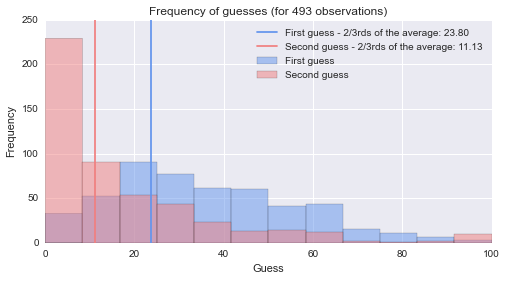

In [10]:
bins = 12 
plt.figure()
plt.xlabel('Guess')
plt.xlim(0,100)
plt.ylabel('Frequency')
plt.title('Frequency of guesses (for {} observations)'.format(len(data)))
plt.hist(data['Guess 1'], bins, color="#6495ED", alpha=.5, label='First guess')
two_thirds = 2 * data['Guess 1'].mean() / 3
plt.axvline(two_thirds, color='#6495ED', label='First guess - 2/3rds of the average: {:.2f}'.format(two_thirds))
plt.hist(data['Guess 2'], bins, color="#F08080", alpha=.5, label='Second guess')
two_thirds = 2 * data['Guess 2'].mean() / 3
plt.axvline(two_thirds, color='#F08080', label='Second guess - 2/3rds of the average: {:.2f}'.format(two_thirds))

plt.legend();
plt.savefig('output/histogram_of_guesses.pdf')

Including a joint plot of the linear relationship of the second guess against the first.

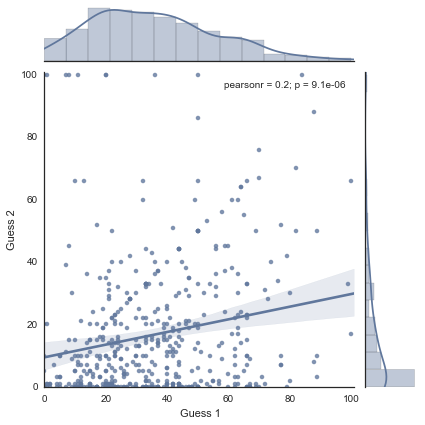

In [11]:
x = data['Guess 1']
y = data['Guess 2']
plt.figure()
with sns.axes_style("white"):
    sns.jointplot(x, y, kind='reg',xlim=(0,101), ylim=(0,101));
plt.savefig('output/jointplot_of_guesses.pdf')

As you can see the relationship is very week $R^2=.2$. Below is the fit:

$$
y = .203 x + 9.45
$$

This shows that your second guess is more likey to be high if your first guess is but is also in general lower than your first guess.

In [12]:
lm = LinearRegression()
lm.fit([[row] for row in data['Guess 1']], [[row] for row in data['Guess 2']])
lm.coef_, lm.intercept_

(array([[ 0.20282138]]), array([ 9.44694459]))

# Repeating all of the above removing guesses that increase

In [13]:
data = data[(data['Guess 1'] >= data['Guess 2'])]

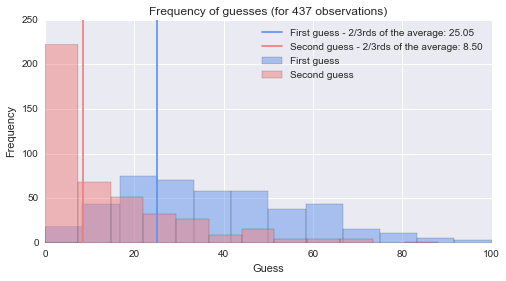

In [14]:
bins = 12 
plt.figure()
plt.xlabel('Guess')
plt.xlim(0,100)
plt.ylabel('Frequency')
plt.title('Frequency of guesses (for {} observations)'.format(len(data)))
plt.hist(data['Guess 1'], bins, color="#6495ED", alpha=.5, label='First guess')
two_thirds = 2 * data['Guess 1'].mean() / 3
plt.axvline(two_thirds, color='#6495ED', label='First guess - 2/3rds of the average: {:.2f}'.format(two_thirds))
plt.hist(data['Guess 2'], bins, color="#F08080", alpha=.5, label='Second guess')
two_thirds = 2 * data['Guess 2'].mean() / 3
plt.axvline(two_thirds, color='#F08080', label='Second guess - 2/3rds of the average: {:.2f}'.format(two_thirds))

plt.legend();
plt.savefig('output/histogram_of_guesses_removing_increasing_guesses.pdf')

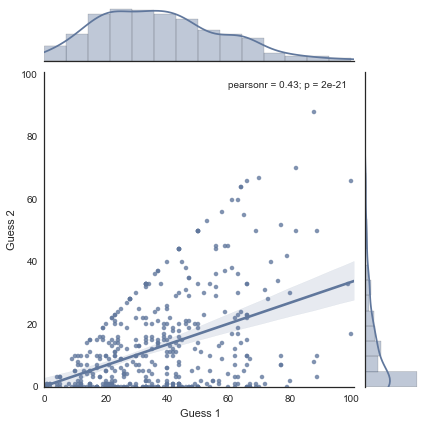

In [15]:
x = data['Guess 1']
y = data['Guess 2']
plt.figure()
with sns.axes_style("white"):
    sns.jointplot(x, y, kind='reg', xlim=(0,101), ylim=(0,101));
plt.savefig('output/jointplot_of_guesses_removing_increasing_guesses.pdf')

In [16]:
lm = LinearRegression()
lm.fit([[row] for row in data['Guess 1']], [[row] for row in data['Guess 2']])
lm.coef_, lm.intercept_

(array([[ 0.33386797]]), array([ 0.20112021]))

# Running the evolutionary Axelrod tournament

In [17]:
import axelrod

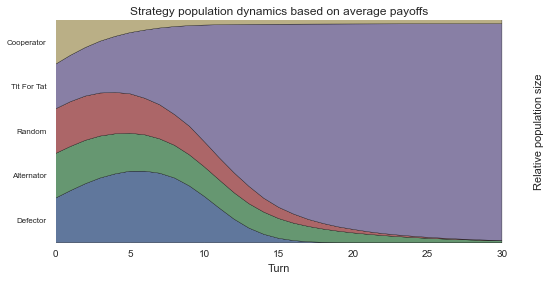

In [18]:
strategies = [s() for s in axelrod.basic_strategies]
tournament = axelrod.Tournament(strategies)
results = tournament.play()
eco = axelrod.Ecosystem(results)
eco.reproduce(30) # Evolve the population over 50 time steps
plot = axelrod.Plot(results)
p = plot.stackplot(eco.population_sizes)
p.savefig('output/basic_strategies-reproduce.pdf')